In [1]:


import pandas as pd
df = pd.read_excel('Public_Debt_Levels_All_Countries.xls', skiprows=[1])



In [2]:
print(df)

    DEBT (% of GDP)     1800     1801     1802     1803     1804     1805  \
0       Afghanistan  no data  no data  no data  no data  no data  no data   
1           Albania  no data  no data  no data  no data  no data  no data   
2           Algeria  no data  no data  no data  no data  no data  no data   
3            Angola  no data  no data  no data  no data  no data  no data   
4          Anguilla  no data  no data  no data  no data  no data  no data   
..              ...      ...      ...      ...      ...      ...      ...   
190   G-20 Advanced    97.46    96.59   102.73   103.23   102.29   101.49   
191   G-20 Emerging  no data  no data  no data  no data  no data  no data   
192      Low Income  no data  no data  no data  no data  no data  no data   
193             NaN      NaN      NaN      NaN      NaN      NaN      NaN   
194      ©IMF, 2023      NaN      NaN      NaN      NaN      NaN      NaN   

        1806     1807     1808  ...   2006   2007   2008   2009   2010   20

In [3]:
# List of countries to keep
countries_to_keep = ['Denmark', 'United Kingdom', 'Ireland']

# Filter rows based on the values in the first column
df_filtered = df[df['DEBT (% of GDP)'].isin(countries_to_keep)]

print(df_filtered)

    DEBT (% of GDP)     1800     1801     1802     1803     1804     1805  \
45          Denmark  no data  no data  no data  no data  no data  no data   
80          Ireland  no data  no data  no data  no data  no data  no data   
178  United Kingdom   176.84   177.47   188.99   190.67    188.4   189.07   

        1806     1807     1808  ...   2006   2007   2008   2009   2010  \
45   no data  no data  no data  ...  31.54  27.34  33.39  40.37  42.88   
80   no data  no data  no data  ...  24.81  25.01  44.34  61.68   86.3   
178   192.64   193.88   191.51  ...  41.02  42.21  50.27   64.2  75.74   

       2011    2012    2013    2014   2015  
45    46.41   45.19   44.65   44.77  45.53  
80   109.61  119.48  119.47  105.25  78.68  
178   81.32   84.82      86   87.94  88.98  

[3 rows x 217 columns]


In [4]:
df_transposed = df_filtered.transpose()

print(df_transposed)

                     45       80              178
DEBT (% of GDP)  Denmark  Ireland  United Kingdom
1800             no data  no data          176.84
1801             no data  no data          177.47
1802             no data  no data          188.99
1803             no data  no data          190.67
...                  ...      ...             ...
2011               46.41   109.61           81.32
2012               45.19   119.48           84.82
2013               44.65   119.47              86
2014               44.77   105.25           87.94
2015               45.53    78.68           88.98

[217 rows x 3 columns]


In [5]:
df_transposed_reset = df_transposed.reset_index()
print(df_transposed_reset)

               index       45       80             178
0    DEBT (% of GDP)  Denmark  Ireland  United Kingdom
1               1800  no data  no data          176.84
2               1801  no data  no data          177.47
3               1802  no data  no data          188.99
4               1803  no data  no data          190.67
..               ...      ...      ...             ...
212             2011    46.41   109.61           81.32
213             2012    45.19   119.48           84.82
214             2013    44.65   119.47              86
215             2014    44.77   105.25           87.94
216             2015    45.53    78.68           88.98

[217 rows x 4 columns]


In [6]:
headers = df_transposed_reset.iloc[0]
df = pd.DataFrame(df_transposed_reset.values[1:], columns = headers)
df = df.rename(columns={"DEBT (% of GDP)": "Year"})
print(df)

0    Year  Denmark  Ireland United Kingdom
0    1800  no data  no data         176.84
1    1801  no data  no data         177.47
2    1802  no data  no data         188.99
3    1803  no data  no data         190.67
4    1804  no data  no data          188.4
..    ...      ...      ...            ...
211  2011    46.41   109.61          81.32
212  2012    45.19   119.48          84.82
213  2013    44.65   119.47             86
214  2014    44.77   105.25          87.94
215  2015    45.53    78.68          88.98

[216 rows x 4 columns]


In [7]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(df)

# Reset display options to the default values (optional)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

0    Year  Denmark  Ireland United Kingdom
0    1800  no data  no data         176.84
1    1801  no data  no data         177.47
2    1802  no data  no data         188.99
3    1803  no data  no data         190.67
4    1804  no data  no data          188.4
5    1805  no data  no data         189.07
6    1806  no data  no data         192.64
7    1807  no data  no data         193.88
8    1808  no data  no data         191.51
9    1809  no data  no data         188.99
10   1810  no data  no data         186.69
11   1811  no data  no data         182.51
12   1812  no data  no data         188.11
13   1813  no data  no data         196.74
14   1814  no data  no data         219.62
15   1815  no data  no data         226.31
16   1816  no data  no data         237.32
17   1817  no data  no data         231.09
18   1818  no data  no data         259.04
19   1819  no data  no data         260.29
20   1820  no data  no data         259.95
21   1821  no data  no data         260.34
22   1822  

In [8]:
df = df.iloc[136:,:]

print(df)

0    Year Denmark Ireland United Kingdom
136  1936   18.98   31.43         170.19
137  1937   17.91   31.26         158.69
138  1938    16.6   31.23         155.08
139  1939    15.3   37.42         149.68
140  1940   14.62   36.18         121.06
..    ...     ...     ...            ...
211  2011   46.41  109.61          81.32
212  2012   45.19  119.48          84.82
213  2013   44.65  119.47             86
214  2014   44.77  105.25          87.94
215  2015   45.53   78.68          88.98

[80 rows x 4 columns]


In [9]:
df = df.reset_index()
df = df.iloc[:,1:]
print(df)

0   Year Denmark Ireland United Kingdom
0   1936   18.98   31.43         170.19
1   1937   17.91   31.26         158.69
2   1938    16.6   31.23         155.08
3   1939    15.3   37.42         149.68
4   1940   14.62   36.18         121.06
..   ...     ...     ...            ...
75  2011   46.41  109.61          81.32
76  2012   45.19  119.48          84.82
77  2013   44.65  119.47             86
78  2014   44.77  105.25          87.94
79  2015   45.53   78.68          88.98

[80 rows x 4 columns]


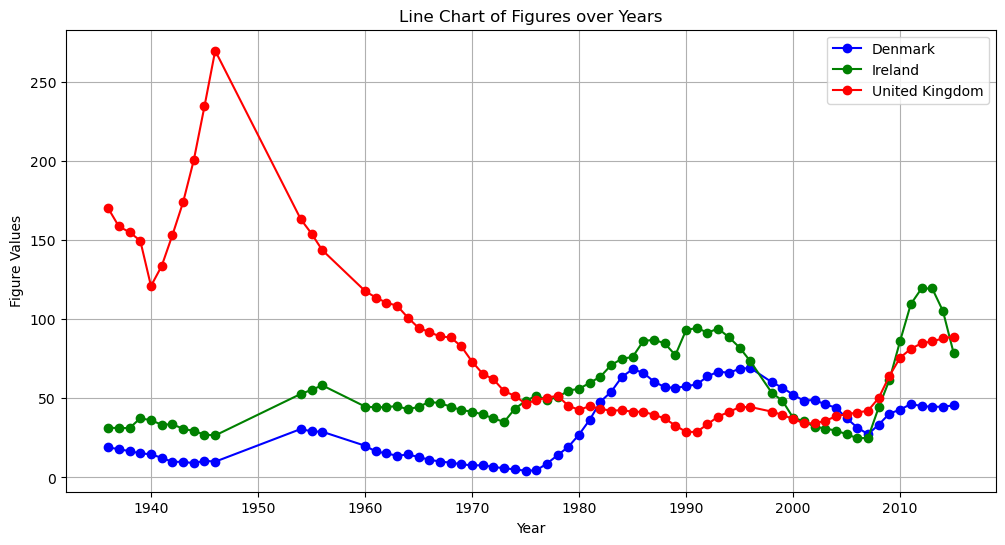

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Your existing code for data preparation...

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Convert "no data" values to NaN
df.replace('no data', pd.NA, inplace=True)

# Convert the data columns to numeric type, handling errors
df[['Denmark', 'Ireland', 'United Kingdom']] = df[['Denmark', 'Ireland', 'United Kingdom']].apply(pd.to_numeric, errors='coerce')

# Plotting the Line Chart, excluding rows with "no data" values
df_filtered = df.dropna(subset=['Denmark', 'Ireland', 'United Kingdom'], how='any')


# Adjust the size of the figure (width, height) using the figsize parameter
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting each country's line with specific colors
df_filtered.plot(x='Year', y='Denmark', marker='o', color='blue', ax=ax, label='Denmark')
df_filtered.plot(x='Year', y='Ireland', marker='o', color='green', ax=ax, label='Ireland')
df_filtered.plot(x='Year', y='United Kingdom', marker='o', color='red', ax=ax, label='United Kingdom')

# Setting the title and labels
plt.title('Line Chart of Figures over Years')
plt.xlabel('Year')
plt.ylabel('Figure Values')

# Adding the grid and showing the plot
plt.grid(True)
plt.show()


In [11]:
inflation_df = pd.read_excel('Inflation_Rate_All_countries.xlsx', skiprows=4)
print(inflation_df)

                    Country Name Country Code  \
0                          Aruba          ABW   
1    Africa Eastern and Southern          AFE   
2                    Afghanistan          AFG   
3     Africa Western and Central          AFW   
4                         Angola          AGO   
..                           ...          ...   
261                       Kosovo          XKX   
262                  Yemen, Rep.          YEM   
263                 South Africa          ZAF   
264                       Zambia          ZMB   
265                     Zimbabwe          ZWE   

                            Indicator Name  Indicator Code      1960  \
0    Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG       NaN   
1    Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG       NaN   
2    Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG       NaN   
3    Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG       NaN   
4    Inflation, consumer prices (annual %)  FP.CPI.

In [12]:
inflation_df_filtered = inflation_df[inflation_df['Country Name'].isin(countries_to_keep)]
print(inflation_df_filtered)

       Country Name Country Code                         Indicator Name  \
58          Denmark          DNK  Inflation, consumer prices (annual %)   
81   United Kingdom          GBR  Inflation, consumer prices (annual %)   
111         Ireland          IRL  Inflation, consumer prices (annual %)   

     Indicator Code      1960      1961      1962      1963      1964  \
58   FP.CPI.TOTL.ZG  1.255230  3.451629  7.377820  6.105033  3.092784   
81   FP.CPI.TOTL.ZG  1.003576  3.447496  4.196499  2.018544  3.281587   
111  FP.CPI.TOTL.ZG  0.450837  2.756999  4.263727  2.453621  6.717290   

         1965  ...      2013      2014      2015      2016      2017  \
58   5.450000  ...  0.789072  0.564021  0.452034  0.250000  1.147132   
81   4.773775  ...  2.291667  1.451120  0.368047  1.008417  2.557756   
111  4.988124  ...  0.508715  0.182542 -0.289879  0.008306  0.340532   

         2018      2019      2020      2021      2022  
58   0.813609  0.758132  0.420712  1.853045  7.696567  
81   

In [13]:
inflation_df_filtered = inflation_df_filtered.drop(columns=['Country Code', 'Indicator Code', 'Indicator Name'])
print(inflation_df_filtered)

       Country Name      1960      1961      1962      1963      1964  \
58          Denmark  1.255230  3.451629  7.377820  6.105033  3.092784   
81   United Kingdom  1.003576  3.447496  4.196499  2.018544  3.281587   
111         Ireland  0.450837  2.756999  4.263727  2.453621  6.717290   

         1965      1966      1967      1968  ...      2013      2014  \
58   5.450000  7.064960  8.207854  8.005207  ...  0.789072  0.564021   
81   4.773775  3.909618  2.482116  4.697428  ...  2.291667  1.451120   
111  4.988124  3.054299  3.183315  4.680851  ...  0.508715  0.182542   

         2015      2016      2017      2018      2019      2020      2021  \
58   0.452034  0.250000  1.147132  0.813609  0.758132  0.420712  1.853045   
81   0.368047  1.008417  2.557756  2.292840  1.738105  0.989487  2.518371   
111 -0.289879  0.008306  0.340532  0.488370  0.939044 -0.334585  2.358143   

         2022  
58   7.696567  
81   7.922049  
111  7.807375  

[3 rows x 64 columns]


In [14]:
inflation_df_transposed = inflation_df_filtered.transpose()

print(inflation_df_transposed)

                   58              81        111
Country Name   Denmark  United Kingdom   Ireland
1960           1.25523        1.003576  0.450837
1961          3.451629        3.447496  2.756999
1962           7.37782        4.196499  4.263727
1963          6.105033        2.018544  2.453621
...                ...             ...       ...
2018          0.813609         2.29284   0.48837
2019          0.758132        1.738105  0.939044
2020          0.420712        0.989487 -0.334585
2021          1.853045        2.518371  2.358143
2022          7.696567        7.922049  7.807375

[64 rows x 3 columns]


In [15]:
inflation_df_transposed_reset = inflation_df_transposed.reset_index()
print(inflation_df_transposed_reset)

           index        58              81       111
0   Country Name   Denmark  United Kingdom   Ireland
1           1960   1.25523        1.003576  0.450837
2           1961  3.451629        3.447496  2.756999
3           1962   7.37782        4.196499  4.263727
4           1963  6.105033        2.018544  2.453621
..           ...       ...             ...       ...
59          2018  0.813609         2.29284   0.48837
60          2019  0.758132        1.738105  0.939044
61          2020  0.420712        0.989487 -0.334585
62          2021  1.853045        2.518371  2.358143
63          2022  7.696567        7.922049  7.807375

[64 rows x 4 columns]


In [16]:
headers = inflation_df_transposed_reset.iloc[0]
inflation_df = pd.DataFrame(inflation_df_transposed_reset.values[1:], columns = headers)
inflation_df = inflation_df.rename(columns={"Country Name": "Year"})
print(inflation_df)

0   Year   Denmark United Kingdom   Ireland
0   1960   1.25523       1.003576  0.450837
1   1961  3.451629       3.447496  2.756999
2   1962   7.37782       4.196499  4.263727
3   1963  6.105033       2.018544  2.453621
4   1964  3.092784       3.281587   6.71729
..   ...       ...            ...       ...
58  2018  0.813609        2.29284   0.48837
59  2019  0.758132       1.738105  0.939044
60  2020  0.420712       0.989487 -0.334585
61  2021  1.853045       2.518371  2.358143
62  2022  7.696567       7.922049  7.807375

[63 rows x 4 columns]


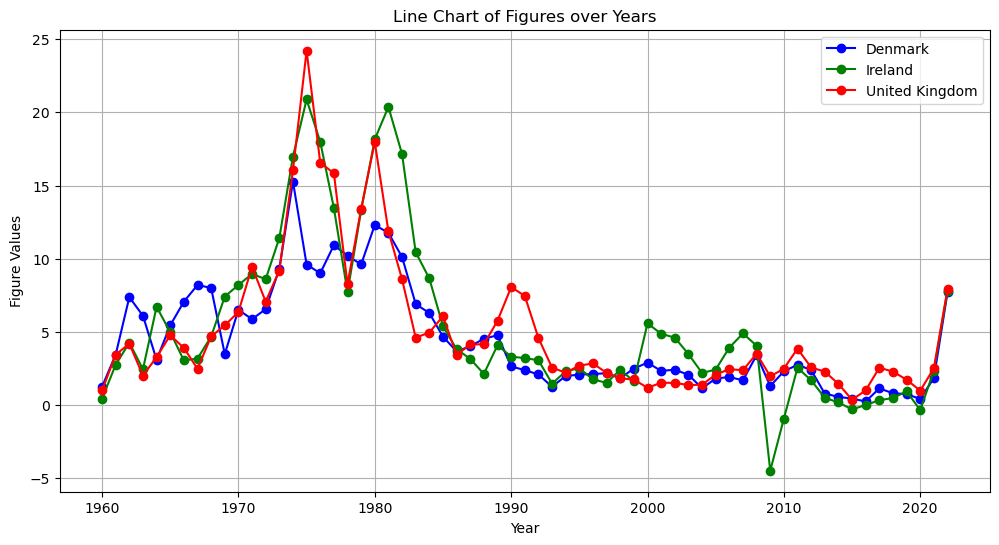

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'inflation_df'
# Your existing code for data preparation...

# Adjust the size of the figure (width, height) using the figsize parameter
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting each country's line with specific colors
inflation_df.plot(x='Year', y='Denmark', marker='o', color='blue', ax=ax, label='Denmark')
inflation_df.plot(x='Year', y='Ireland', marker='o', color='green', ax=ax, label='Ireland')
inflation_df.plot(x='Year', y='United Kingdom', marker='o', color='red', ax=ax, label='United Kingdom')

# Setting the title and labels
plt.title('Line Chart of Figures over Years')
plt.xlabel('Year')
plt.ylabel('Figure Values')

# Adding the grid and showing the plot
plt.grid(True)
plt.show()


In [26]:
GDP_df = pd.read_csv('GDP_Growth_all_countries.csv', skiprows=4)
print(GDP_df)

                    Country Name Country Code         Indicator Name  \
0                          Aruba          ABW  GDP growth (annual %)   
1    Africa Eastern and Southern          AFE  GDP growth (annual %)   
2                    Afghanistan          AFG  GDP growth (annual %)   
3     Africa Western and Central          AFW  GDP growth (annual %)   
4                         Angola          AGO  GDP growth (annual %)   
..                           ...          ...                    ...   
261                       Kosovo          XKX  GDP growth (annual %)   
262                  Yemen, Rep.          YEM  GDP growth (annual %)   
263                 South Africa          ZAF  GDP growth (annual %)   
264                       Zambia          ZMB  GDP growth (annual %)   
265                     Zimbabwe          ZWE  GDP growth (annual %)   

        Indicator Code  1960      1961      1962      1963       1964  \
0    NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN    

In [27]:
GDP_df.head

<bound method NDFrame.head of                     Country Name Country Code         Indicator Name  \
0                          Aruba          ABW  GDP growth (annual %)   
1    Africa Eastern and Southern          AFE  GDP growth (annual %)   
2                    Afghanistan          AFG  GDP growth (annual %)   
3     Africa Western and Central          AFW  GDP growth (annual %)   
4                         Angola          AGO  GDP growth (annual %)   
..                           ...          ...                    ...   
261                       Kosovo          XKX  GDP growth (annual %)   
262                  Yemen, Rep.          YEM  GDP growth (annual %)   
263                 South Africa          ZAF  GDP growth (annual %)   
264                       Zambia          ZMB  GDP growth (annual %)   
265                     Zimbabwe          ZWE  GDP growth (annual %)   

        Indicator Code  1960      1961      1962      1963       1964  \
0    NY.GDP.MKTP.KD.ZG   NaN    

In [28]:
GDP_df_filtered = GDP_df[GDP_df['Country Name'].isin(countries_to_keep)]
GDP_df_filtered.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
58,Denmark,DNK,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,6.378832,5.666822,0.637021,9.269938,4.555255,...,1.619394,2.342591,3.245957,2.821736,1.989537,1.493487,-2.424513,6.844522,2.731174,NaN
81,United Kingdom,GBR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,...,3.195782,2.220258,1.921063,2.655070,1.403792,1.641611,-10.359901,8.674904,4.346561,NaN
111,Ireland,IRL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.828999,24.475253,1.765557,9.311259,8.470295,5.297728,6.617195,15.125220,9.433022,NaN


In [29]:
GDP_df_filtered = GDP_df_filtered.drop(columns=['Country Code', 'Indicator Code', 'Indicator Name'])
GDP_df_filtered.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
58,Denmark,NaN,6.378832,5.666822,0.637021,9.269938,4.555255,2.74091,5.530370,5.553077,...,1.619394,2.342591,3.245957,2.821736,1.989537,1.493487,-2.424513,6.844522,2.731174,NaN
81,United Kingdom,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,1.57310,2.786475,5.441083,...,3.195782,2.220258,1.921063,2.655070,1.403792,1.641611,-10.359901,8.674904,4.346561,NaN
111,Ireland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.828999,24.475253,1.765557,9.311259,8.470295,5.297728,6.617195,15.125220,9.433022,NaN


In [30]:
GDP_df_transposed = GDP_df_filtered.transpose()

GDP_df_transposed.head()

,58,81,111
Country Name,Denmark,United Kingdom,Ireland
1960,NaN,NaN,NaN
1961,6.378832,2.677119,NaN
1962,5.666822,1.10291,NaN
1963,0.637021,4.874384,NaN


In [31]:
GDP_df_transposed_reset = GDP_df_transposed.reset_index()
GDP_df_transposed.head()

,58,81,111
Country Name,Denmark,United Kingdom,Ireland
1960,NaN,NaN,NaN
1961,6.378832,2.677119,NaN
1962,5.666822,1.10291,NaN
1963,0.637021,4.874384,NaN


In [32]:
headers = GDP_df_transposed_reset.iloc[0]
GDP_df = pd.DataFrame(GDP_df_transposed_reset.values[1:], columns = headers)
GDP_df = GDP_df.rename(columns={"Country Name": "Year"})
GDP_df.head()

,Year,Denmark,United Kingdom,Ireland
0,1960,NaN,NaN,NaN
1,1961,6.378832,2.677119,NaN
2,1962,5.666822,1.10291,NaN
3,1963,0.637021,4.874384,NaN
4,1964,9.269938,5.533659,NaN


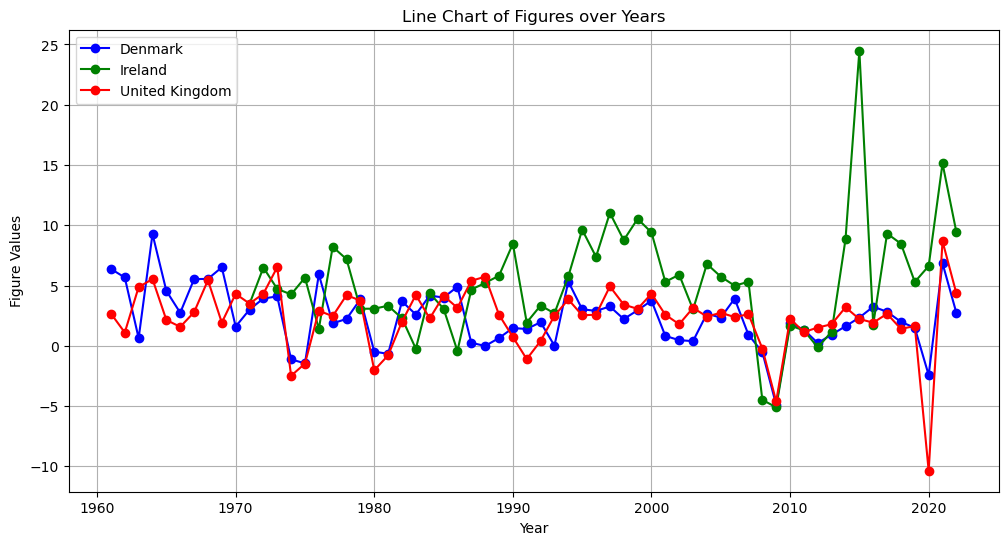

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'inflation_df'
# Your existing code for data preparation...

# Adjust the size of the figure (width, height) using the figsize parameter
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting each country's line with specific colors
GDP_df.plot(x='Year', y='Denmark', marker='o', color='blue', ax=ax, label='Denmark')
GDP_df.plot(x='Year', y='Ireland', marker='o', color='green', ax=ax, label='Ireland')
GDP_df.plot(x='Year', y='United Kingdom', marker='o', color='red', ax=ax, label='United Kingdom')

# Setting the title and labels
plt.title('Line Chart of Figures over Years')
plt.xlabel('Year')
plt.ylabel('Figure Values')

# Adding the grid and showing the plot
plt.grid(True)
plt.show()


In [41]:
df_filtered.head()
df_filtered = df_filtered.rename(columns={"Denmark": "Denmark_Public_Debt_Pc_of_GDP"})
df_filtered = df_filtered.rename(columns={"United Kingdom": "United Kingdom_Public_Debt_Pc_of_GDP"})
df_filtered = df_filtered.rename(columns={"Ireland": "Ireland_Public_Debt_Pc_of_GDP"})
df_filtered.head()

,Year,Denmark_Public_Debt_Pc_of_GDP,Ireland_Public_Debt_Pc_of_GDP,United Kingdom_Public_Debt_Pc_of_GDP
0,1936,18.98,31.43,170.19
1,1937,17.91,31.26,158.69
2,1938,16.60,31.23,155.08
3,1939,15.30,37.42,149.68
4,1940,14.62,36.18,121.06


In [40]:

inflation_df = inflation_df.rename(columns={"Denmark": "Denmark_Inflation"})
inflation_df = inflation_df.rename(columns={"United Kingdom": "United Kingdom_Inflation"})
inflation_df = inflation_df.rename(columns={"Ireland": "Ireland_Inflation"})
inflation_df.head()

,Year,Denmark_Inflation,United Kingdom_Inflation,Ireland_Inflation
0,1960,1.25523,1.003576,0.450837
1,1961,3.451629,3.447496,2.756999
2,1962,7.37782,4.196499,4.263727
3,1963,6.105033,2.018544,2.453621
4,1964,3.092784,3.281587,6.71729


In [39]:
GDP_df = GDP_df.rename(columns={"Denmark": "Denmark_GDP"})
GDP_df = GDP_df.rename(columns={"United Kingdom": "United Kingdom_GDP"})
GDP_df = GDP_df.rename(columns={"Ireland": "Ireland_GDP"})
GDP_df.head()

,Year,Denmark_GDP,United Kingdom_GDP,Ireland_GDP
0,1960,NaN,NaN,NaN
1,1961,6.378832,2.677119,NaN
2,1962,5.666822,1.10291,NaN
3,1963,0.637021,4.874384,NaN
4,1964,9.269938,5.533659,NaN


In [43]:
merged_df = pd.merge(df_filtered, inflation_df, on='Year', how='outer')
merged_df['Year'] = merged_df['Year'].astype(int)
merged_df.head()

C:\Users\conor\AppData\Local\Temp\ipykernel_8180\1288373757.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  merged_df = pd.merge(df_filtered, inflation_df, on='Year', how='outer')


,Year,Denmark_Public_Debt_Pc_of_GDP,Ireland_Public_Debt_Pc_of_GDP,United Kingdom_Public_Debt_Pc_of_GDP,Denmark_Inflation,United Kingdom_Inflation,Ireland_Inflation
0,1936,18.98,31.43,170.19,NaN,NaN,NaN
1,1937,17.91,31.26,158.69,NaN,NaN,NaN
2,1938,16.60,31.23,155.08,NaN,NaN,NaN
3,1939,15.30,37.42,149.68,NaN,NaN,NaN
4,1940,14.62,36.18,121.06,NaN,NaN,NaN


In [47]:
distinct_years = GDP_df['Year'].unique()
print(distinct_years)


['1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022' 'Unnamed: 67']


In [48]:
GDP_df = GDP_df[GDP_df['Year'] != 'Unnamed: 67']

# You may also want to reset the index if necessary
GDP_df.reset_index(drop=True, inplace=True)

In [49]:
distinct_years = GDP_df['Year'].unique()
print(distinct_years)

['1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022']


In [50]:
GDP_df['Year'] = GDP_df['Year'].astype(int)
merged_df2 = pd.merge(merged_df, GDP_df, on='Year', how='outer')
merged_df2['Year'] = merged_df2['Year'].astype(int)
merged_df2.head()

C:\Users\conor\AppData\Local\Temp\ipykernel_8180\2222385628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_df['Year'] = GDP_df['Year'].astype(int)


,Year,Denmark_Public_Debt_Pc_of_GDP,Ireland_Public_Debt_Pc_of_GDP,United Kingdom_Public_Debt_Pc_of_GDP,Denmark_Inflation,United Kingdom_Inflation,Ireland_Inflation,Denmark_GDP,United Kingdom_GDP,Ireland_GDP
0,1936,18.98,31.43,170.19,NaN,NaN,NaN,NaN,NaN,NaN
1,1937,17.91,31.26,158.69,NaN,NaN,NaN,NaN,NaN,NaN
2,1938,16.60,31.23,155.08,NaN,NaN,NaN,NaN,NaN,NaN
3,1939,15.30,37.42,149.68,NaN,NaN,NaN,NaN,NaN,NaN
4,1940,14.62,36.18,121.06,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
merged_df2.to_csv('Merged_Datasets.csv', index=False)